In [1]:
from glob import glob

import warnings
warnings.filterwarnings('ignore') # :clown:

In [2]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt

In [3]:
files = glob('../data/ecg_preprocessed/*.csv')[0]

In [4]:
df = pd.read_csv(files)

In [5]:
df

,timestamp,signal,signal_normalised,subject_id,category,code,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,...,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,2017-12-15 10:16:06+00:00,-7.293812e-05,0.493088,30100,NaN,NaN,-7.293812e-05,-0.000095,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,2017-12-15 10:16:06.001000+00:00,-8.270390e-05,0.492200,30100,NaN,NaN,-8.270390e-05,-0.000097,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,2017-12-15 10:16:06.002000+00:00,-9.491112e-05,0.491090,30100,NaN,NaN,-9.491112e-05,-0.000100,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,2017-12-15 10:16:06.003000+00:00,-1.028458e-04,0.490368,30100,NaN,NaN,-1.028458e-04,-0.000102,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,2017-12-15 10:16:06.004000+00:00,-1.095598e-04,0.489757,30100,NaN,NaN,-1.095598e-04,-0.000105,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691995,2017-12-15 12:40:57.995000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000010,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
8691996,2017-12-15 12:40:57.996000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000010,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
8691997,2017-12-15 12:40:57.997000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000009,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
8691998,2017-12-15 12:40:57.998000+00:00,3.051804e-07,0.499750,30100,Recov6,48.0,3.051804e-07,-0.000009,8.127879,0.000000,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0


### ECG_Quality

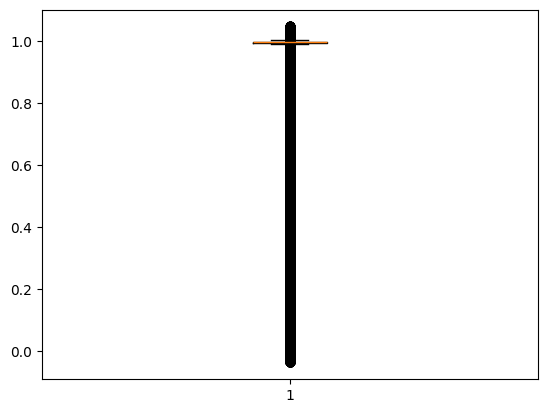

In [10]:
plt.boxplot(df['ECG_Quality'])
plt.show()

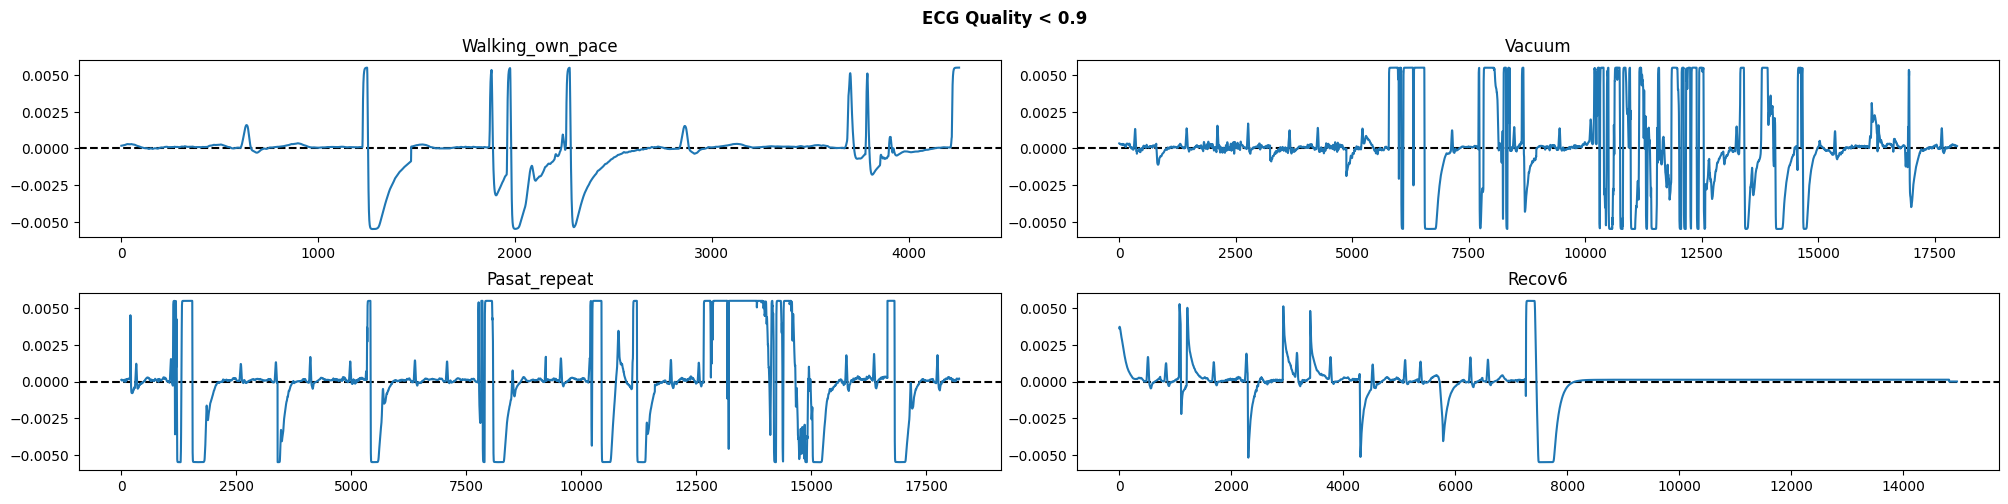

In [63]:
quality_treshold = 0.9
sample = df[df['ECG_Quality'] < quality_treshold]

fig, axs = plt.subplots(math.ceil(len(sample.category.unique()) / 2), 2, figsize=(20,5))

for category, ax in zip(sample.category.unique(), axs.flatten()):
    y = sample[sample['category'] == category]['signal']
    x = range(len(y))

    ax.set_title(category)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.plot(x, y, label=category)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.suptitle(f"ECG Quality < {quality_treshold}", fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()

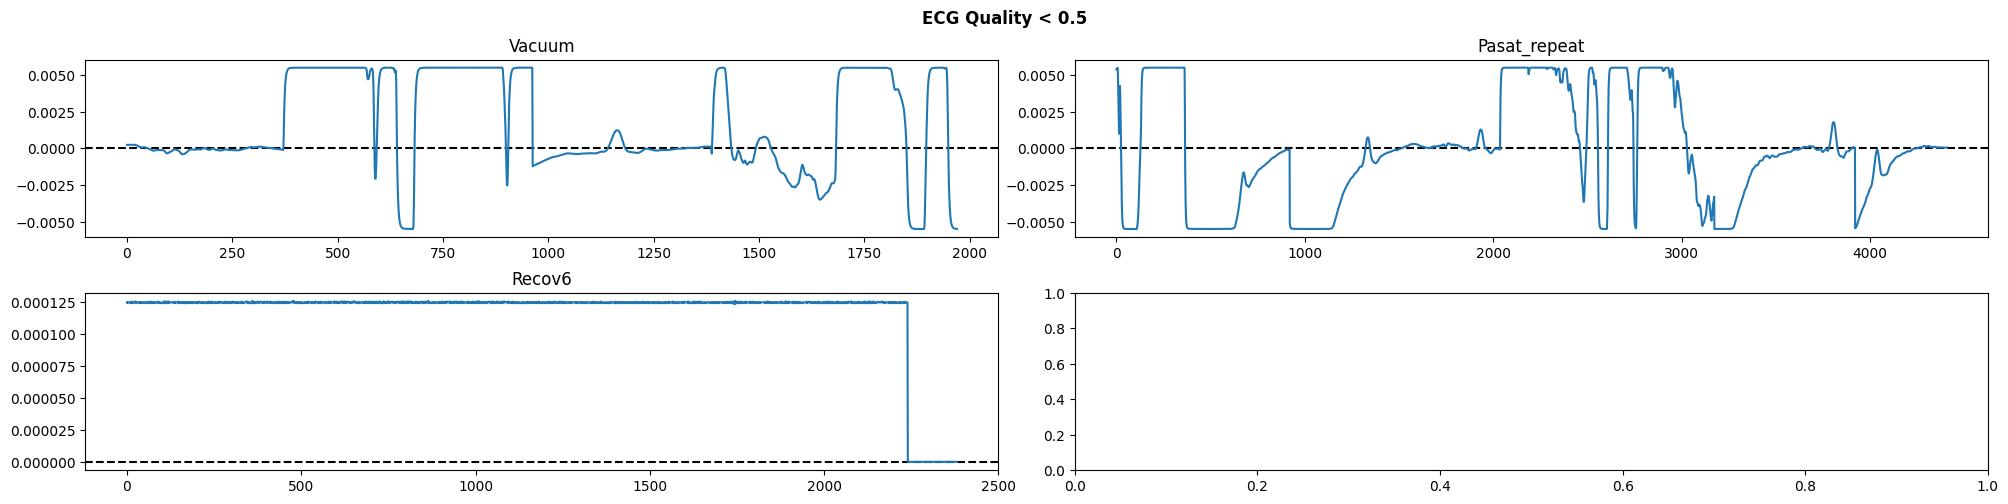

In [64]:
quality_treshold = 0.5
sample = df[df['ECG_Quality'] < quality_treshold]

fig, axs = plt.subplots(math.ceil(len(sample.category.unique()) / 2), 2, figsize=(20,5))

for category, ax in zip(sample.category.unique(), axs.flatten()):
    y = sample[sample['category'] == category]['signal']
    x = range(len(y))

    ax.set_title(category)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.plot(x, y, label=category)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.suptitle(f"ECG Quality < {quality_treshold}", fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()

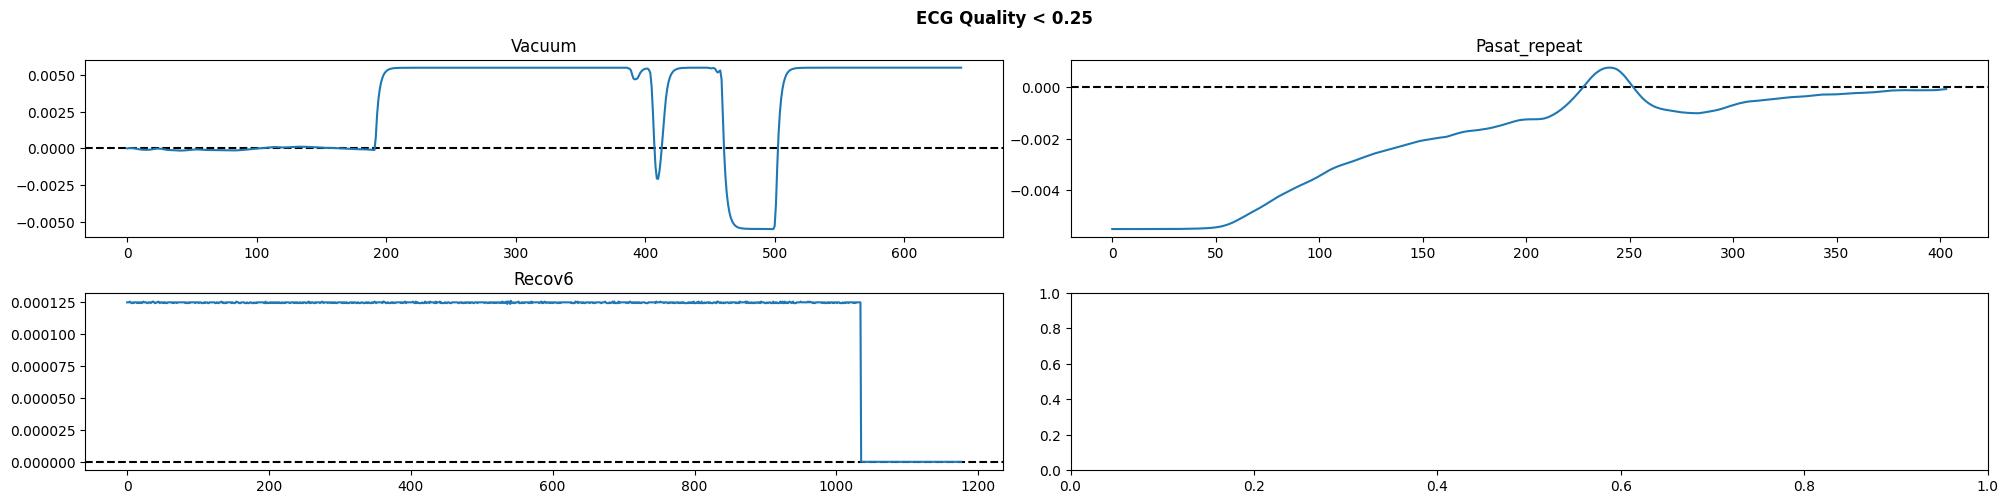

In [65]:
quality_treshold = 0.25
sample = df[df['ECG_Quality'] < quality_treshold]

fig, axs = plt.subplots(math.ceil(len(sample.category.unique()) / 2), 2, figsize=(20,5))

for category, ax in zip(sample.category.unique(), axs.flatten()):
    y = sample[sample['category'] == category]['signal']
    x = range(len(y))

    ax.set_title(category)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.plot(x, y, label=category)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.suptitle(f"ECG Quality < {quality_treshold}", fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()

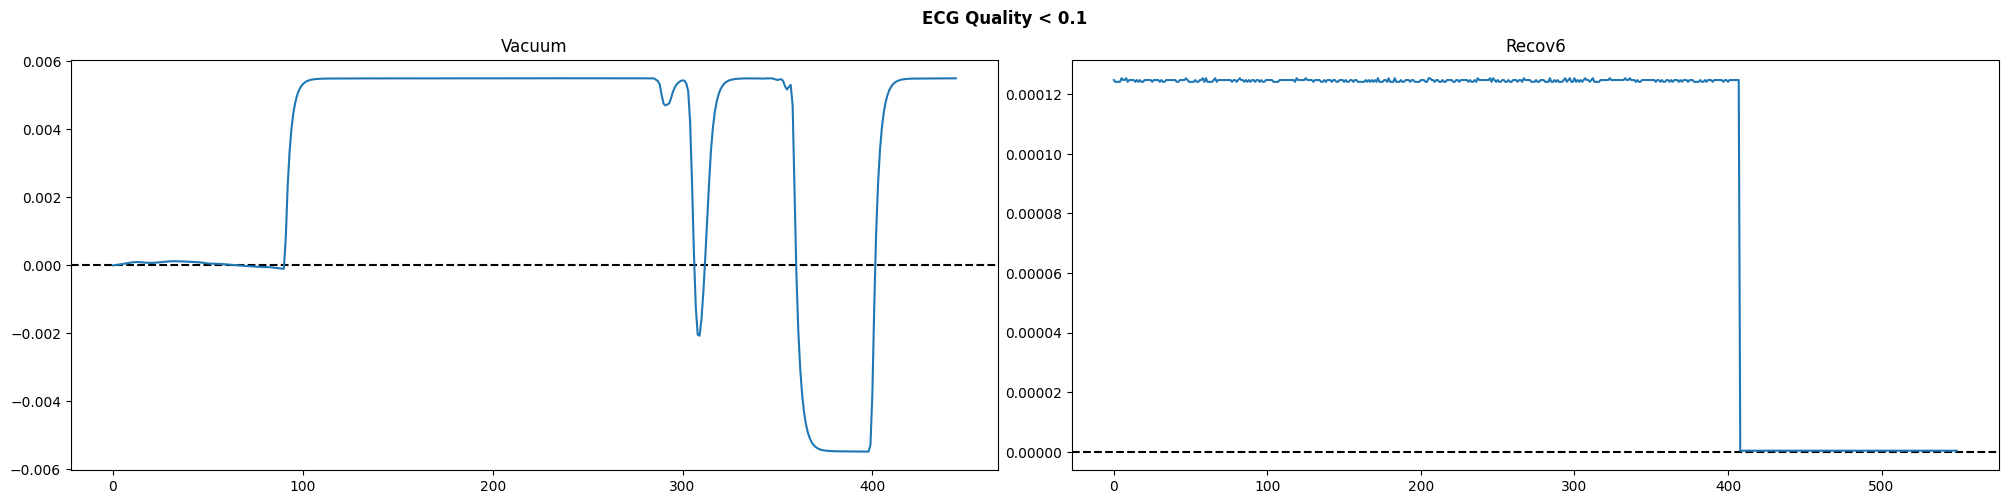

In [66]:
quality_treshold = 0.1
sample = df[df['ECG_Quality'] < quality_treshold]

fig, axs = plt.subplots(math.ceil(len(sample.category.unique()) / 2), 2, figsize=(20,5))

for category, ax in zip(sample.category.unique(), axs.flatten()):
    y = sample[sample['category'] == category]['signal']
    x = range(len(y))

    ax.set_title(category)
    ax.axhline(y=0, color='black', linestyle='--')
    ax.plot(x, y, label=category)

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.suptitle(f"ECG Quality < {quality_treshold}", fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()

## Task 1: R-R Intervals

In [67]:
import neurokit2 as nk

In [68]:
r_peaks = nk.ecg_findpeaks(df['ECG_Clean'], 1000)

In [69]:
r_peaks

{'ECG_R_Peaks': array([    788,    1941,    3030, ..., 8683962, 8684456, 8691838])}

In [70]:
r_peaks['ECG_R_Peaks']

array([    788,    1941,    3030, ..., 8683962, 8684456, 8691838])

In [71]:
df.iloc[r_peaks['ECG_R_Peaks'][0]]

timestamp                           2017-12-15 10:16:06.788000+00:00
signal                                                      0.001295
signal_normalised                                           0.617498
subject_id                                                     30100
category                                                         NaN
code                                                             NaN
ECG_Raw                                                     0.001295
ECG_Clean                                                   0.000932
ECG_Rate                                                   64.763176
ECG_Quality                                                 0.998214
ECG_R_Peaks                                                        1
ECG_P_Peaks                                                        0
ECG_P_Onsets                                                       0
ECG_P_Offsets                                                      0
ECG_Q_Peaks                       

In [72]:
df['ECG_Rate']

0          64.763176
1          64.763176
2          64.763176
3          64.763176
4          64.763176
             ...    
8691995     8.127879
8691996     8.127879
8691997     8.127879
8691998     8.127879
8691999     8.127879
Name: ECG_Rate, Length: 8692000, dtype: float64

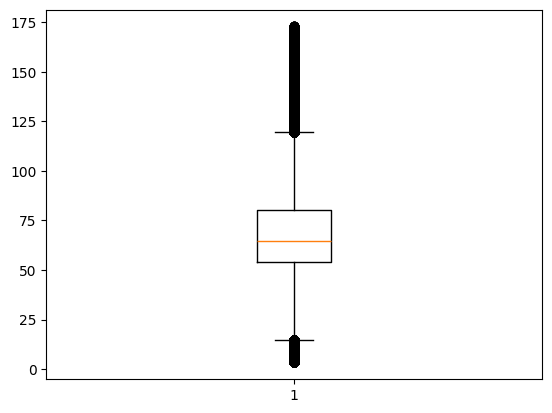

In [73]:
plt.boxplot(df['ECG_Rate'])
plt.show()

In [74]:
df.columns

Index(['timestamp', 'signal', 'signal_normalised', 'subject_id', 'category',
       'code', 'ECG_Raw', 'ECG_Clean', 'ECG_Rate', 'ECG_Quality',
       'ECG_R_Peaks', 'ECG_P_Peaks', 'ECG_P_Onsets', 'ECG_P_Offsets',
       'ECG_Q_Peaks', 'ECG_R_Onsets', 'ECG_R_Offsets', 'ECG_S_Peaks',
       'ECG_T_Peaks', 'ECG_T_Onsets', 'ECG_T_Offsets', 'ECG_Phase_Atrial',
       'ECG_Phase_Completion_Atrial', 'ECG_Phase_Ventricular',
       'ECG_Phase_Completion_Ventricular'],
      dtype='object')

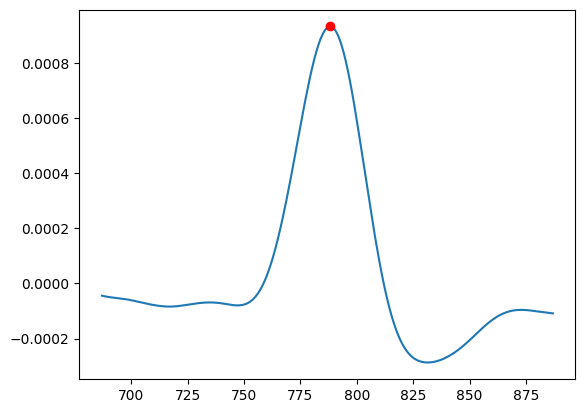

In [75]:
sample = df[:1000]
window = 100
plt.plot(
    sample
    [
        (sample[sample['ECG_R_Peaks'] == 1].index - window)[0]-1
        :
        (sample[sample['ECG_R_Peaks'] == 1].index + window)[0]
    ]['ECG_Clean']
)

plt.plot(
    sample[sample['ECG_R_Peaks'] == 1]['ECG_Clean'],
    marker='o',
    color='r'
)

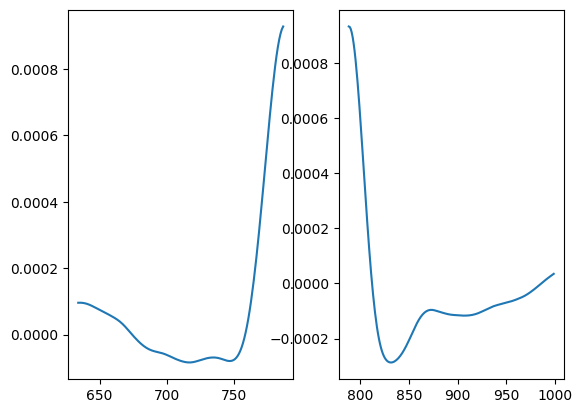

In [76]:
fig, axes = plt.subplots(1,2)
axes[0].plot(df[:1000][df['ECG_Phase_Atrial'] == 1]['ECG_Clean'])
axes[1].plot(df[:1000][df['ECG_Phase_Ventricular'] == 1]['ECG_Clean'])

In [92]:
indices = df[df['ECG_R_Peaks'].eq(1)].index
diffs = np.diff(indices)

In [97]:
# Create an array with index pairs
index_pairs = np.column_stack((indices[:-1], indices[1:]))

# Combine index pairs with differences
result = np.column_stack((index_pairs, diffs))

result = pd.DataFrame(result, columns=['idx_start', 'idx_end', 'distance'])
result

,idx_start,idx_end,distance
0,788,1941,1153
1,1941,3030,1089
2,3030,4059,1029
3,4059,5102,1043
4,5102,6105,1003
...,...,...,...
9376,8674350,8679365,5015
9377,8679365,8682131,2766
9378,8682131,8683962,1831
9379,8683962,8684456,494


In [102]:
result['distance'].describe()

count     9381.000000
mean       926.452404
std        737.670529
min        347.000000
25%        676.000000
50%        830.000000
75%        987.000000
max      18045.000000
Name: distance, dtype: float64

In [116]:
significance_level_left = result.distance.quantile(0.01)
significance_level_right = result.distance.quantile(0.99)
significance_level_left, significance_level_right

(471.0, 4538.60000000002)

In [188]:
sample = result[result.distance.le(significance_level_left) | result.distance.ge(significance_level_right)]
sample = sample.sort_values(by='distance')
sample

,idx_start,idx_end,distance
9010,7512930,7513277,347
9085,7726180,7726552,372
9114,7811023,7811403,380
9079,7713827,7714214,387
9215,8107496,8107894,398
...,...,...,...
9141,7883450,7893699,10249
9041,7590544,7601213,10669
9278,8379676,8390838,11162
9225,8134735,8146639,11904


In [185]:
def plot(start_idx, end_idx, include_range=False, ax=None, illustrate_peak=True, draw_line=True):
    window = df.iloc[start_idx:end_idx + 1]

    if window.empty:
        return

    if ax is None:
        _, ax = plt.subplots(figsize=(30, 10), dpi=300)

    ax.plot(
        window['signal'],
        label='Raw Signal',
        color='blue'
    )
    
    ax.plot(
        window['ECG_Clean'],
        label='Cleaned Signal',
        color='red'
    )

    if draw_line:
        ax.axhline(y=0, color='black', linestyle='--')

    if illustrate_peak:
        for index, peak in window[window['ECG_R_Peaks'] == 1].iterrows():
            ax.scatter(index, peak['ECG_Clean'], color='g')
    
    if include_range:
        left = result[result.idx_end == start_idx].iloc[0]
        right = result[result.idx_start == end_idx].iloc[0]

        left_window = df.iloc[left.idx_start:left.idx_end + 1]
        right_window = df.iloc[right.idx_start:right.idx_end + 1]

        ax.plot(left_window['signal'], color='gray')
        ax.plot(left_window['ECG_Clean'], color='black')

        ax.plot(right_window['signal'], color='gray')
        ax.plot(right_window['ECG_Clean'], color='black')
        
        if illustrate_peak:
            for index, peak in left_window[left_window['ECG_R_Peaks'] == 1].iterrows():
                ax.scatter(index, peak['ECG_Clean'], color='gray')

            for index, peak in right_window[right_window['ECG_R_Peaks'] == 1].iterrows():
                ax.scatter(index, peak['ECG_Clean'], color='gray')

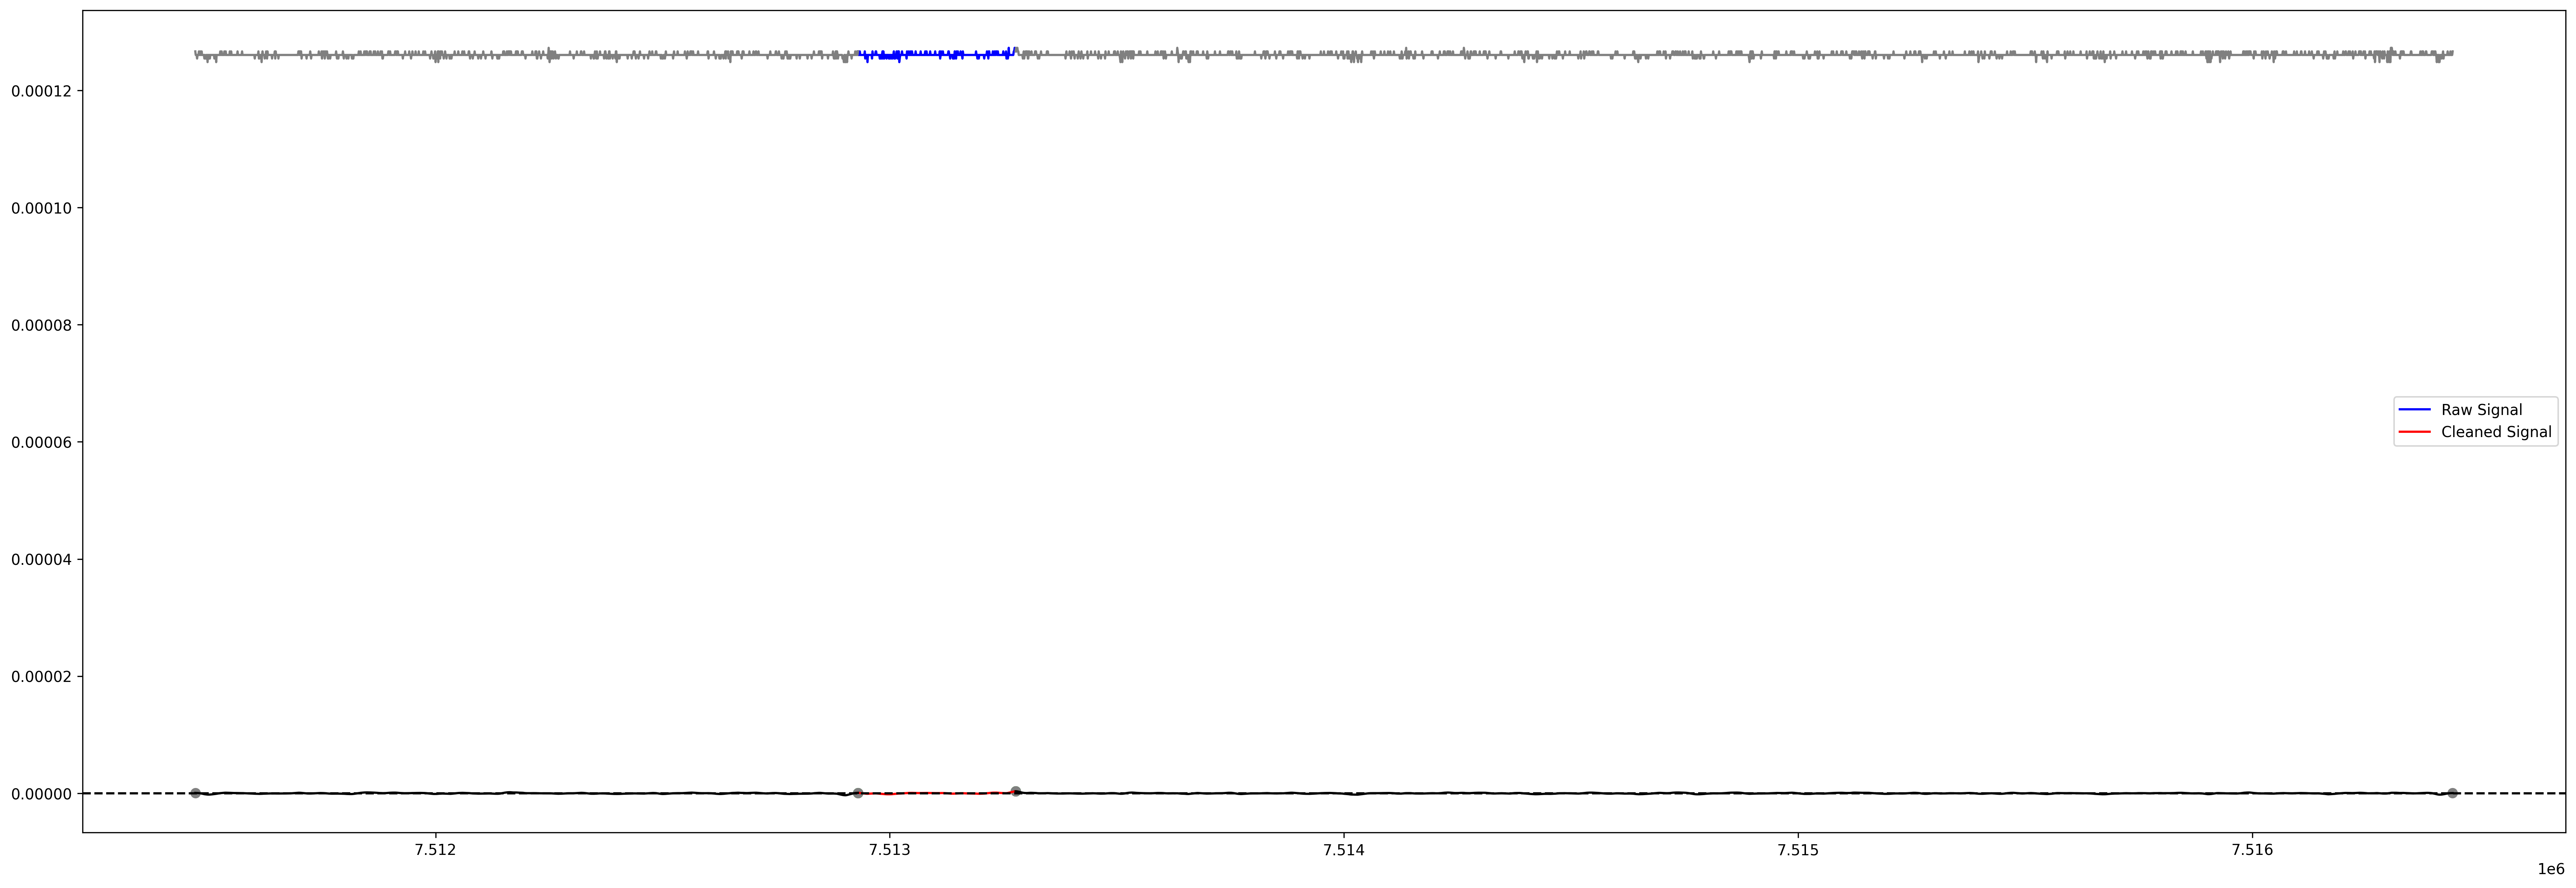

In [189]:
plot(sample.iloc[0].idx_start, sample.iloc[0].idx_end, include_range=True)
plt.legend()

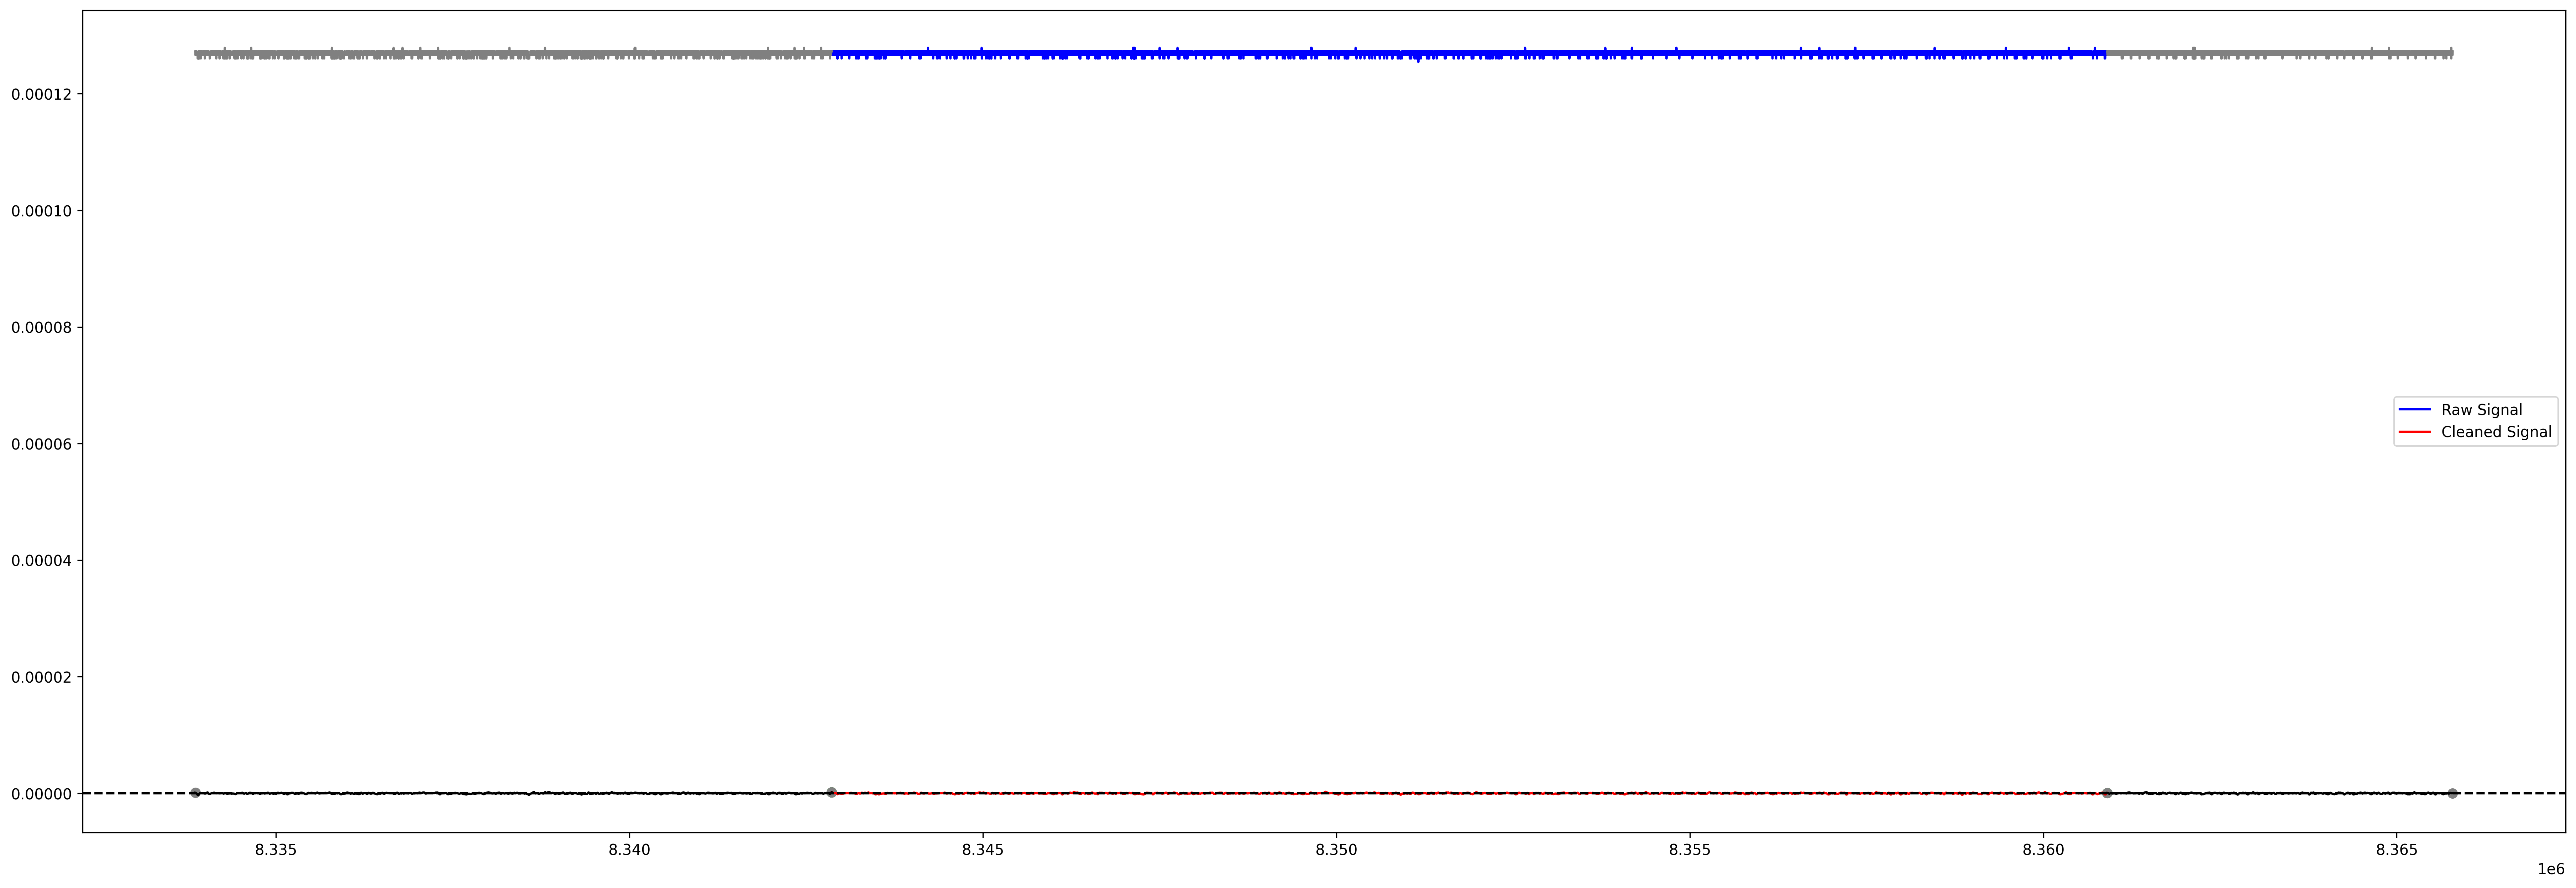

In [190]:
plot(sample.iloc[len(sample) - 1].idx_start, sample.iloc[len(sample) - 1].idx_end, include_range=True)
plt.legend()

In [62]:
def plot(target, r=1, ax=None, label=None, illustrate_peak=True, draw_line=True):
    window = df[df['r_cumsum'].between(target - r, target + r)]

    if window.empty:
        return

    sample = window[window['r_cumsum'] == target]
    rest = window[window['r_cumsum'] != target]

    if ax is None:
        _, ax = plt.subplots(figsize=(30, 10), dpi=300)

    if illustrate_peak:
        ax.plot(
            rest['ECG_Clean'],
        )

        ax.plot(
            sample['ECG_Clean']
        )
    else:
        ax.plot(
            range(len(window)),
            window['ECG_Clean'],
            label=label
        )

    if draw_line:
        ax.axhline(y=0, color='black', linestyle='--')

    plt.ylim(df['ECG_Clean'].min() * .25, df['ECG_Clean'].max() * .25)
    plt.title(target)

    if illustrate_peak:
        for index, peak in window[window['ECG_R_Peaks'] == 1].iterrows():
            ax.scatter(index, peak['ECG_Clean'], color='g')

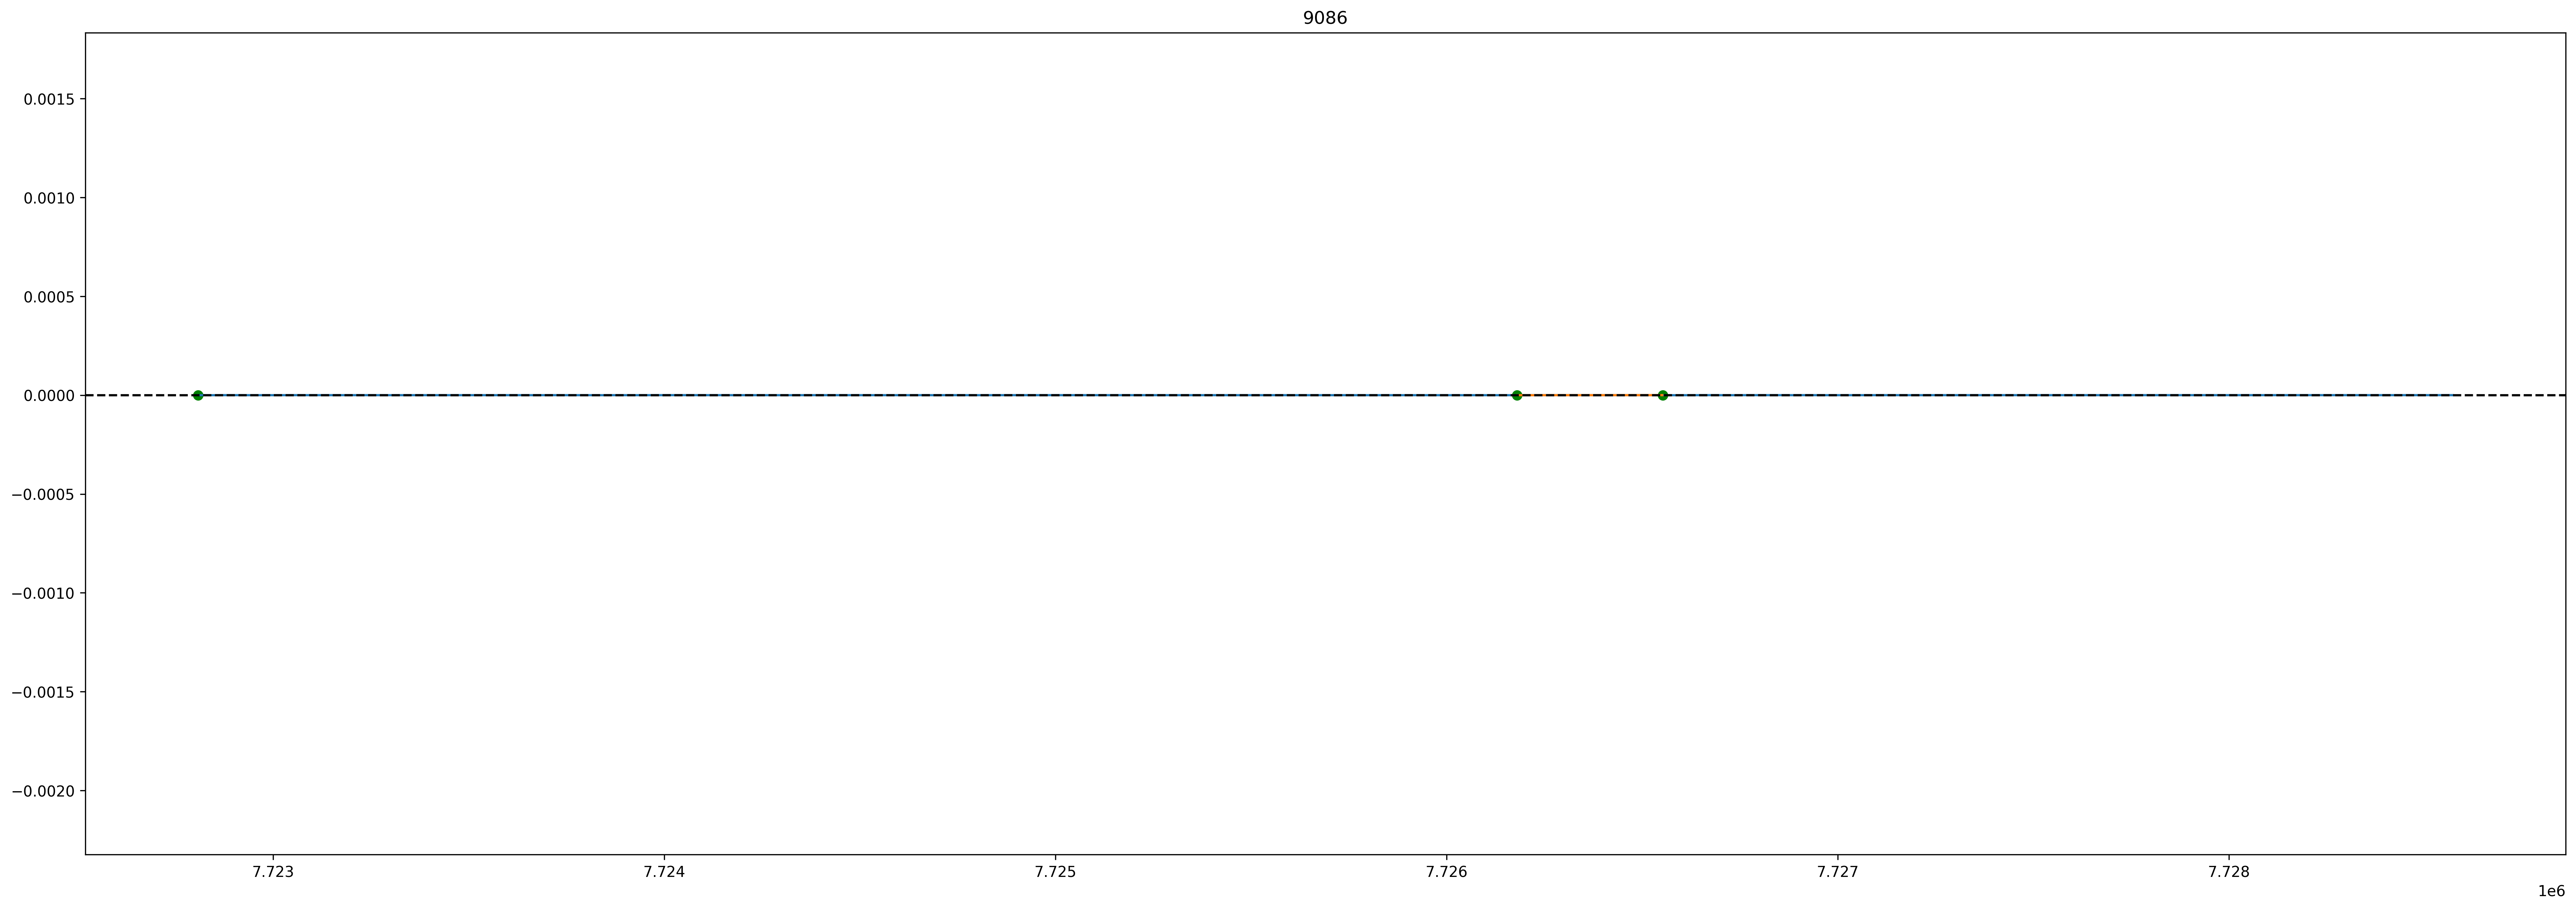

In [37]:
plot(9086, 1)

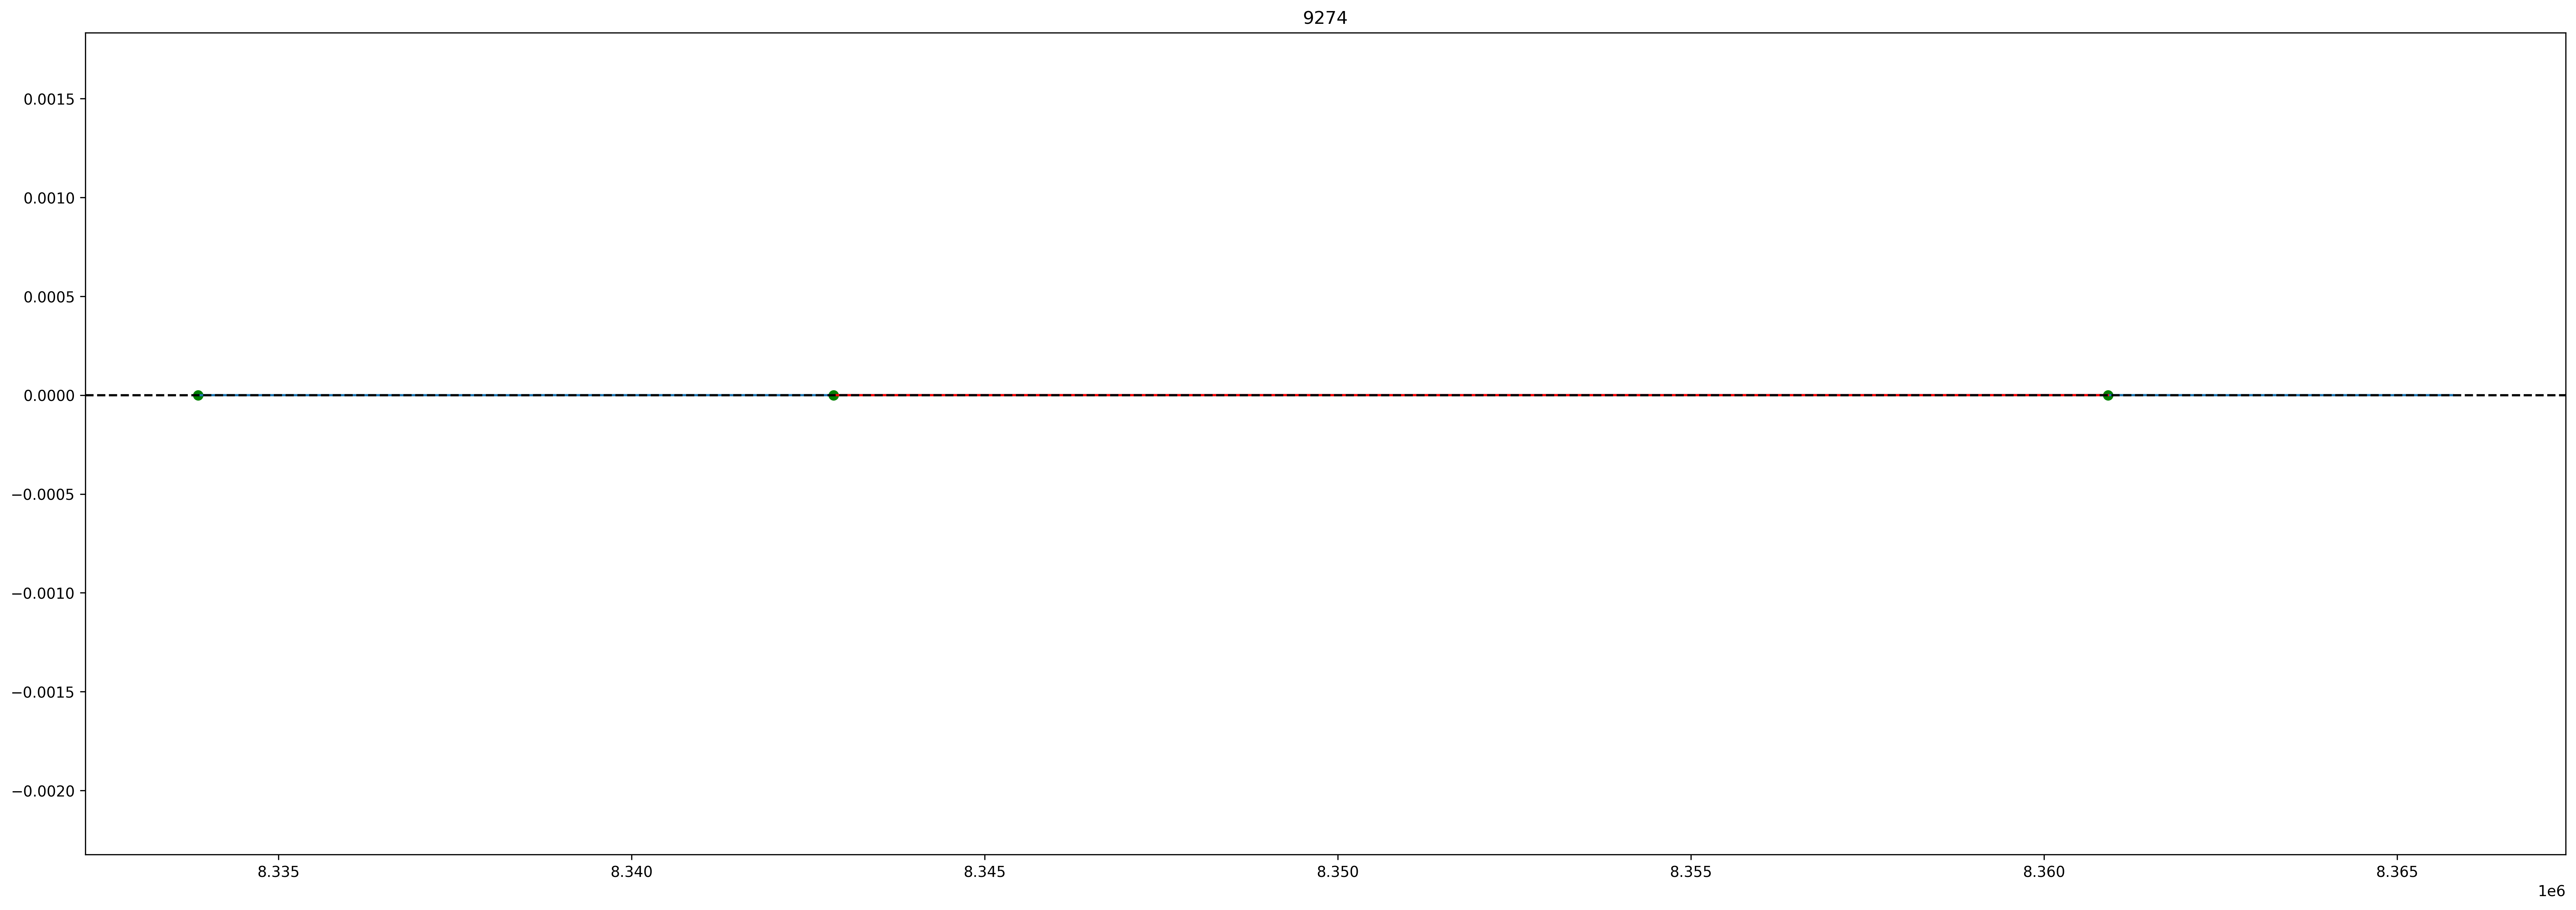

In [23]:
plot(9274, 1)

In [95]:
pct = 0.01

# edges = df.r_cumsum[(df.r_cumsum < np.percentile(df.r_cumsum, pct)) | (df.r_cumsum > np.percentile(df.r_cumsum, 100 - pct))]
edges = df.r_cumsum[(df.r_cumsum > np.percentile(df.r_cumsum, 100-pct))]

len(edges.value_counts().unique())

1

<Figure size 640x480 with 0 Axes>

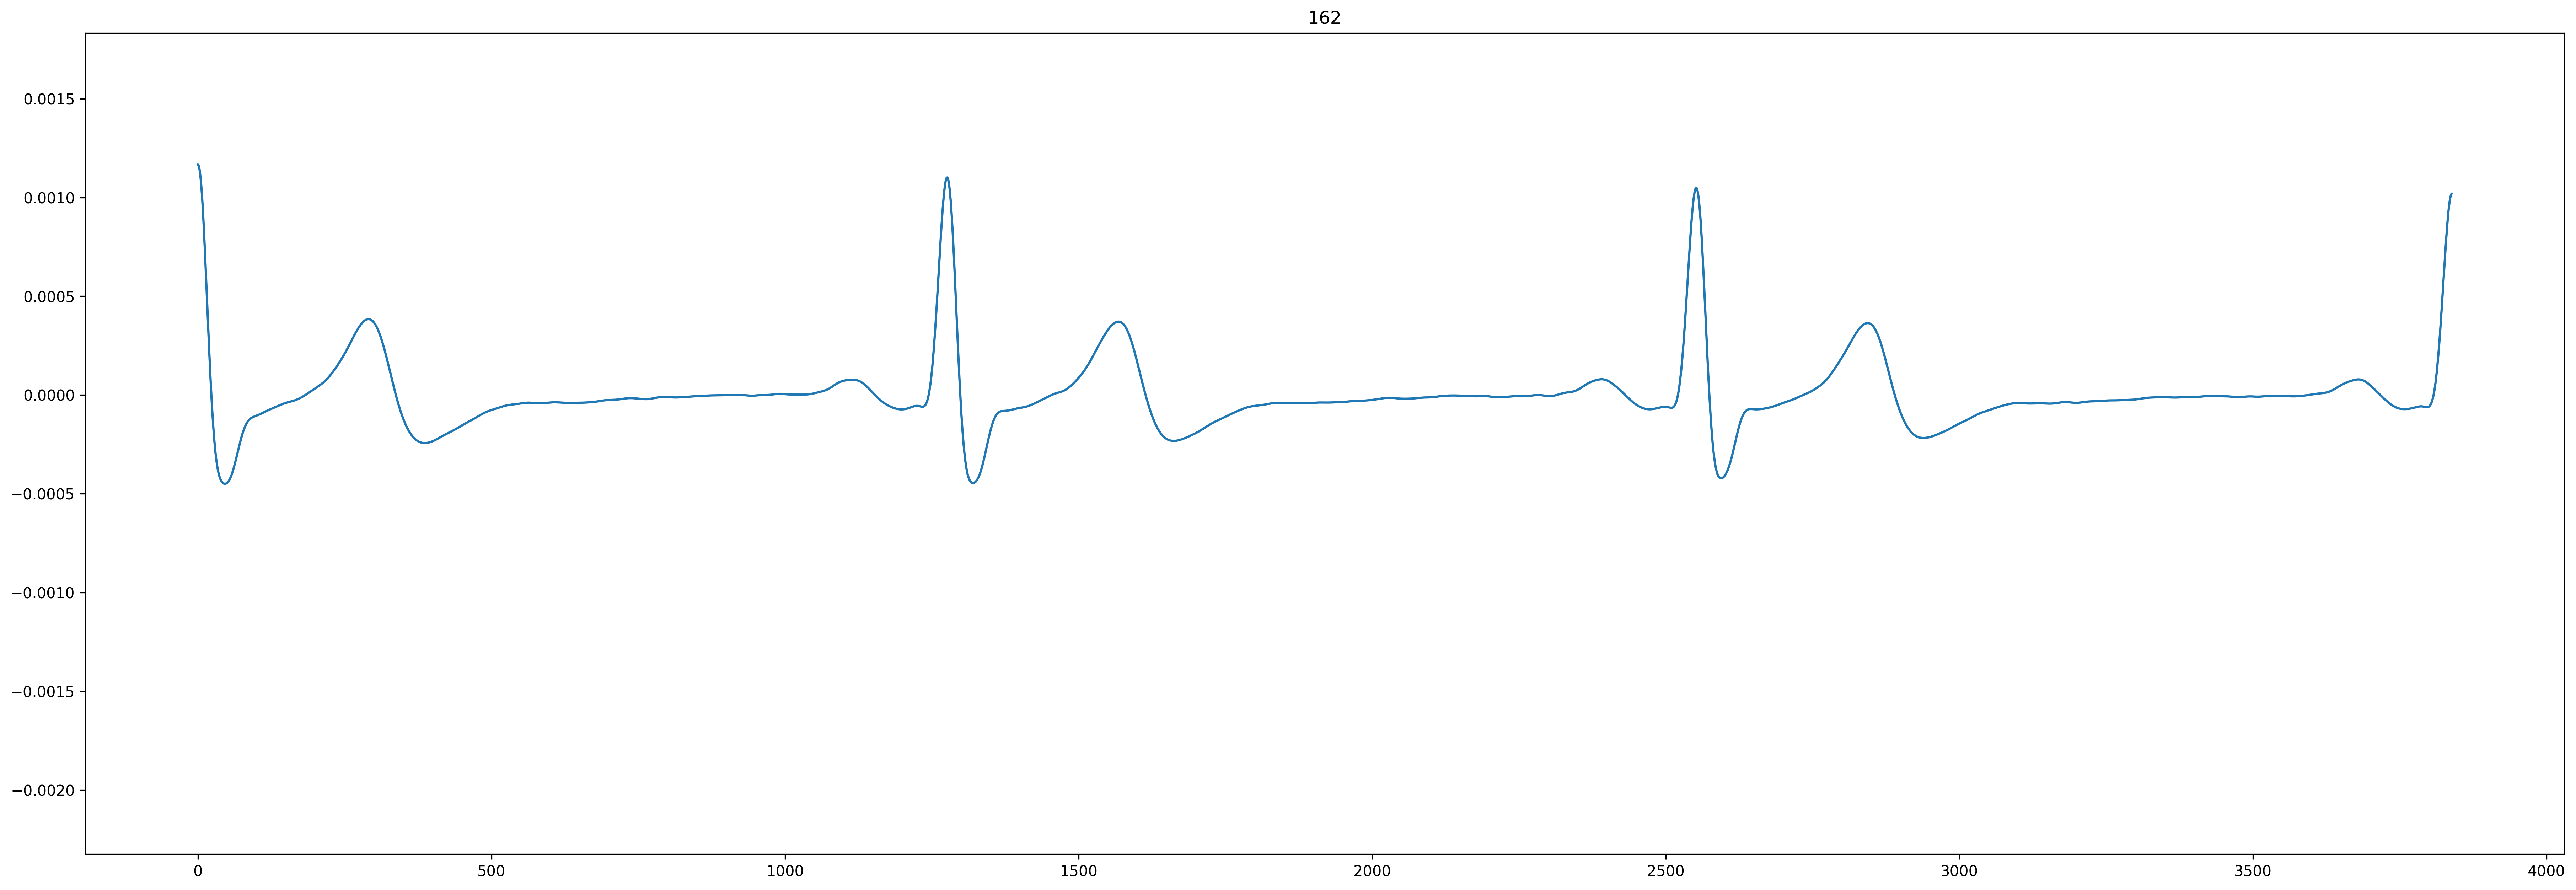

In [96]:
plt.clf()
_, ax = plt.subplots(figsize=(30, 10), dpi=300)
for r in edges.value_counts().unique():
    plot(r, 1, ax=ax, label=r, illustrate_peak=False, draw_line=False)
plt.show()